> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This data contains 110k appointments from different patients in brazil and we are going to check some characteristics. <br>
>**Q's:<br>
>1-What gender usually attends the appointment date?<br>
>2-Does sending an SMS to patients make them more likely to attend the appointment?<br>

In [7]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
%matplotlib inline
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

>-Check for null <br>
>-check for duplicates<br>
>-age < 1 <br>
>-convert scheduledday and apointmentday to datetime format<br>
>-rename no-show and hipertension<br>

### General Properties

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Checking NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
ages=df['Age'].tolist()
ages
def uniquevalues (column_list):
    unival=set(column_list)
    return(unival)
uniquevalues(ages)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 115}

In [10]:
#checking duplicates
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
#age > 1
df=df[df['Age']>1]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# convert dates from string to datetime
pd.to_datetime(df['ScheduledDay'])
pd.to_datetime(df['AppointmentDay'])

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
5        2016-04-29
6        2016-04-29
7        2016-04-29
8        2016-04-29
9        2016-04-29
10       2016-04-29
11       2016-04-29
12       2016-04-29
13       2016-04-29
14       2016-04-29
15       2016-04-29
16       2016-04-29
17       2016-04-29
18       2016-04-29
19       2016-04-29
20       2016-04-29
21       2016-04-29
22       2016-04-29
23       2016-04-29
24       2016-04-29
25       2016-04-29
26       2016-04-29
27       2016-04-29
28       2016-04-29
29       2016-04-29
            ...    
110496   2016-06-08
110497   2016-06-01
110498   2016-06-08
110499   2016-06-01
110500   2016-06-08
110501   2016-06-01
110502   2016-06-08
110503   2016-06-01
110504   2016-06-08
110505   2016-06-01
110506   2016-06-01
110508   2016-06-01
110509   2016-06-08
110510   2016-06-01
110511   2016-06-08
110512   2016-06-08
110513   2016-06-08
110514   2016-06-08
110515   2016-06-08


In [13]:
#Rename headers
df.columns=df.columns.str.lower()
df.rename(columns = {'no-show':'no_show','hipertension':'hypertension'},inplace=True)

In [14]:
df.drop('patientid',axis=1,inplace=True)
df.drop('appointmentid',axis=1,inplace=True)

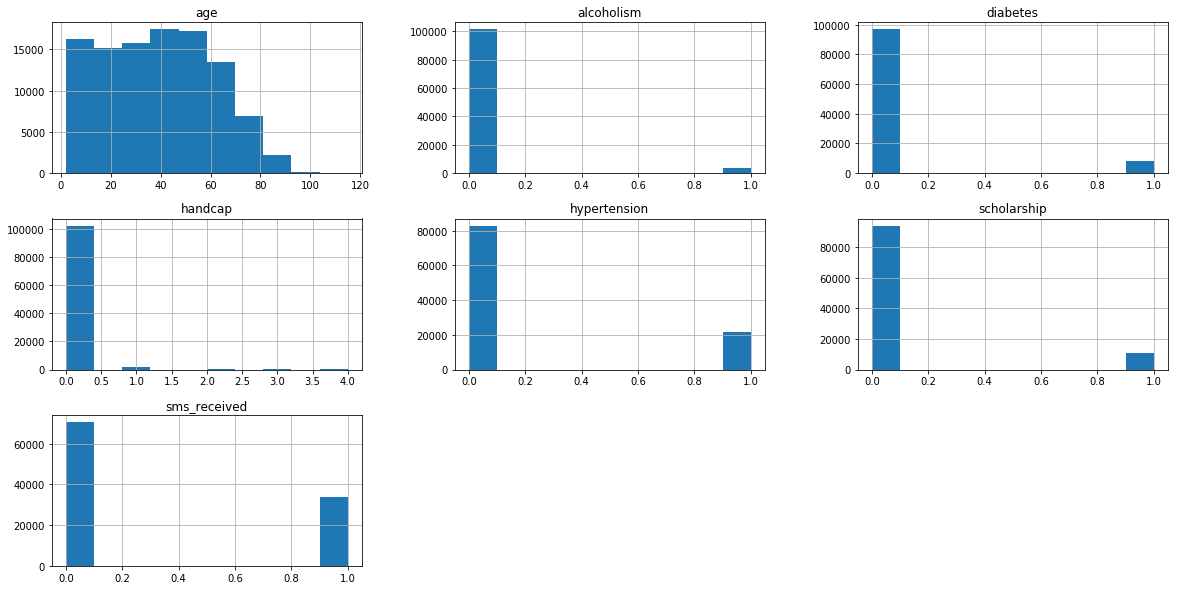

In [15]:
df.hist(figsize=(20, 10));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genders usually attends?

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#group by gender and no_show
df_gb_gn = df.groupby(['gender','no_show']).count()['age']
df_gb_gn

gender  no_show
F       No         54957
        Yes        14073
M       No         28492
        Yes         7192
Name: age, dtype: int64

In [17]:
#filterby gender & who  no_show 
df_f= df[df['gender'] == 'F']
#propotional females
all_f=df_f.count()['age']
no_showf=df_f[df_f['no_show'] == 'Yes'].count()['age']
fc=all_f/no_showf
#proportional males
df_m= df[df['gender'] == 'M']
all_m=df_m[df_m['gender'] == 'M'].count()['age']
no_showm=df_m[df_m['no_show'] == 'Yes'].count()['age']
mc= all_m/no_showm
#counts
counts=[fc,mc]
counts

[4.905137497335323, 4.9616240266963292]

Text(0.5,1,'Counts of no_show / Gender')

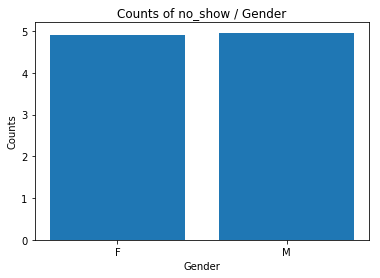

In [18]:
plt.bar([1,2],counts,tick_label=['F','M'])
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Counts of no_show / Gender')

### Does sending an sms matters?  

In [19]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_sms = df.groupby(['sms_received','no_show']).count()['age']
df_sms

sms_received  no_show
0             No         58807
              Yes        11888
1             No         24642
              Yes         9377
Name: age, dtype: int64

In [20]:
df_sms= df[df['sms_received'] == 1]
all_sms=df.count()['sms_received']
show_sms=df_sms[df_sms['no_show'] == 'No'].count()['age']
prop_sms=all_sms/show_sms
df_nosms= df[df['sms_received'] == 0]
show_nosms=df_nosms[df_nosms['no_show'] == 'No'].count()['age']
prop_nosms= all_sms/show_nosms
counts=[prop_sms,prop_nosms]
counts

[4.2494115737358982, 1.7806383593789854]

Text(0.5,1,'Counts of no_show / SMS')

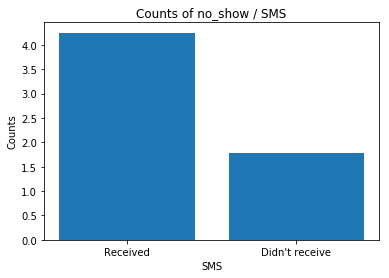

In [21]:
plt.bar([1,2],counts,tick_label=['Received','Didn\'t receive'])
plt.xlabel('SMS')
plt.ylabel('Counts')
plt.title('Counts of no_show / SMS')
#Patients who received sms message are more likely to attend appointment

<a id='conclusions'></a>
## Conclusions

> **Tip**: We can answers the questions of the introduction from the graphs above.<br>
>As it shows above males and females both have the same absence proportions.<br>
>Sending an SMS do increase the appointment attendence by 2x.


In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0